Financial ML Model
Data Preprocessing

In [2]:
import pandas as pd
df = pd.read_csv("Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Description of the data set

In [2]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


Checking for missing values

In [3]:
missing = df.isnull().sum()
print(missing)

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


Checking for duplicates

In [4]:
df.duplicated().sum()

np.int64(0)

Removing irrelevant columns

In [5]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df = df.drop(["LoanID"], axis = 1)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Encoding (HasMortgage, HasDependents and HasCoSigner) using binary encoding

In [4]:
df[["HasMortgage", "HasDependents", "HasCoSigner"]] = df[["HasMortgage", "HasDependents", "HasCoSigner"]].replace({"Yes": 1, "No": 0})
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23716\3875204589.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[["HasMortgage", "HasDependents", "HasCoSigner"]] = df[["HasMortgage", "HasDependents", "HasCoSigner"]].replace({"Yes": 1, "No": 0})


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


One-hot encoding for Education, EmploymentType, MaritalStatus and LoanPurpose

In [5]:
df = pd.get_dummies(df, columns = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"], dtype = int)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,0,0,1,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,0,0,1,0,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,0,1,1,0,0,1,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,0,0,1,0,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0,1,1,0,0,1,0,0,0,0


Feature Engineering (Adding Loan to Income Ration and required monthly payment)

In [6]:
df["LoanAmount/Income"] = df["LoanAmount"] / df["Income"]
df["LoanAmount/LoanTerm"] = df["LoanAmount"] /df["LoanTerm"]
df.head()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,LoanAmount/Income,LoanAmount/LoanTerm
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,1,0,0,0,0,0,0,1,0.588262,1405.194444
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,1,2.467481,2074.000000
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1,0,0,1,0,0,0,0,1.534154,5382.833333
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,1,0,0,1,0,0,0,1.412638,1866.625000
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,1,0,0,0,0,0.447179,190.395833


Visualization of dataset

In [15]:
import matplotlib.pyplot as plt
defaultCount = df["Default"].value_counts()
print(defaultCount)

Default
0    225694
1     29653
Name: count, dtype: int64


In [12]:
print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default', 'Education_Bachelor's',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other',
       'LoanAmount/Income', 'LoanAmount/LoanTerm'],
      dtype='object')


In [14]:
BachelorsCount = df["Education_Bachelor's"].sum()
MastersCount = df["Education_Master's"].sum()
HighSchoolCount = df["Education_High School"].sum()
PhDCount = df["Education_PhD"].sum()

FullTimeCount = df["EmploymentType_Full-time"].sum()
PartTimeCount = df["EmploymentType_Part-time"].sum()
SelfEmployedCount = df["EmploymentType_Self-employed"].sum()
UnemployedCount = df["EmploymentType_Unemployed"].sum()

DivorcedCount = df["MaritalStatus_Divorced"].sum()
MarriedCount = df["MaritalStatus_Married"].sum()
SingleCount = df["MaritalStatus_Single"].sum()

AutoCount = df["LoanPurpose_Auto"].sum()
BusinessCount = df["LoanPurpose_Business"].sum()
EducationCount = df["LoanPurpose_Education"].sum()
HomeCount = df["LoanPurpose_Home"].sum()
OtherCount = df["LoanPurpose_Other"].sum()

print("Education Counts:")
print("Bachelor's:", BachelorsCount)
print("Master's:", MastersCount)
print("High School:", HighSchoolCount)
print("PhD:", PhDCount)
print("-" * 40)

print("Employment Type Counts:")
print("Full-time:", FullTimeCount)
print("Part-time:", PartTimeCount)
print("Self-employed:", SelfEmployedCount)
print("Unemployed:", UnemployedCount)
print("-" * 40)

print("Marital Status Counts:")
print("Divorced:", DivorcedCount)
print("Married:", MarriedCount)
print("Single:", SingleCount)
print("-" * 40)

print("Loan Purpose Counts:")
print("Auto:", AutoCount)
print("Business:", BusinessCount)
print("Education:", EducationCount)
print("Home:", HomeCount)
print("Other:", OtherCount)
print("-" * 40)

Education Counts:
Bachelor's: 64366
Master's: 63541
High School: 63903
PhD: 63537
----------------------------------------
Employment Type Counts:
Full-time: 63656
Part-time: 64161
Self-employed: 63706
Unemployed: 63824
----------------------------------------
Marital Status Counts:
Divorced: 85033
Married: 85302
Single: 85012
----------------------------------------
Loan Purpose Counts:
Auto: 50844
Business: 51298
Education: 51005
Home: 51286
Other: 50914
----------------------------------------


Visualizing Counts using bar chart

C:\Users\DELL\AppData\Local\Temp\ipykernel_10544\116680362.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(education_labels, rotation=30, ha='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_10544\116680362.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(employment_labels, rotation=30, ha='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_10544\116680362.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(marital_labels, rotation=30, ha='right')
C:\Users\DELL\AppData\Local\Temp\ipykernel_10544\116680362.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xtic

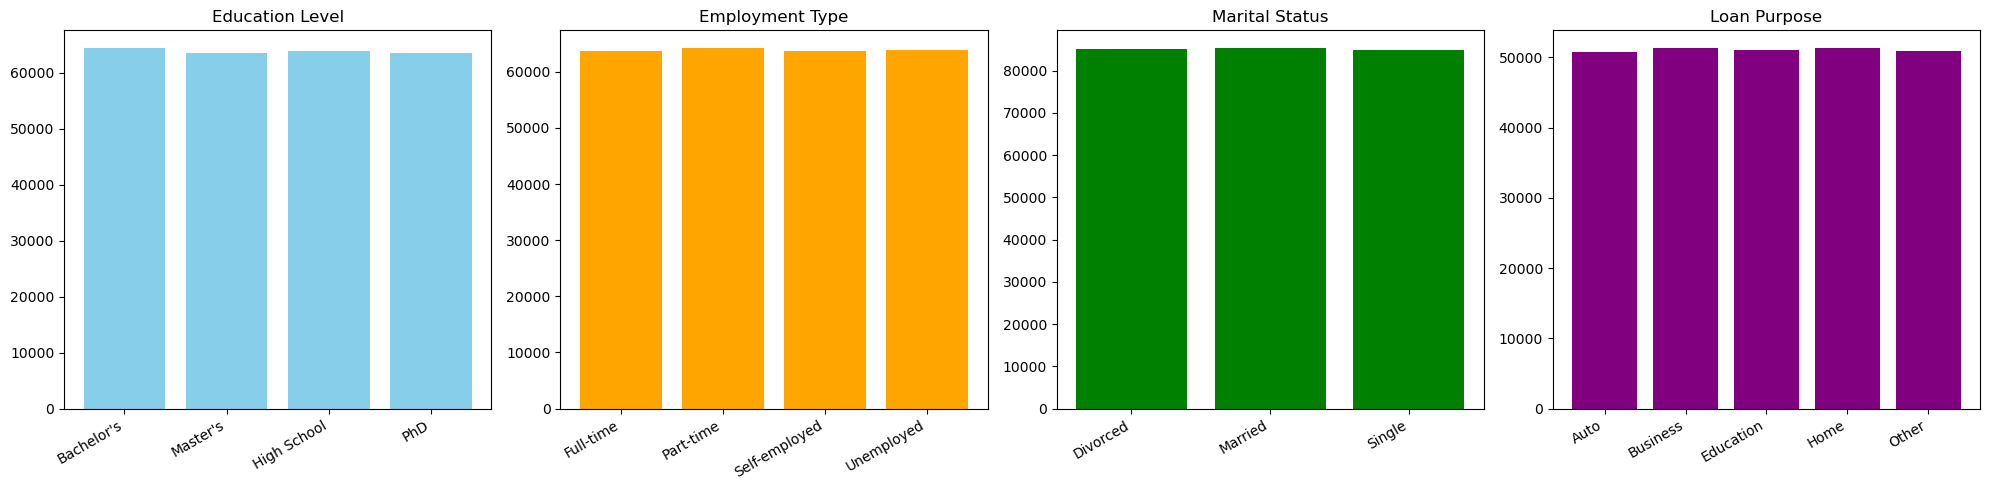

In [16]:
# Education counts
education_labels = ["Bachelor's", "Master's", "High School", "PhD"]
education_values = [BachelorsCount, MastersCount, HighSchoolCount, PhDCount]

# Employment type counts
employment_labels = ["Full-time", "Part-time", "Self-employed", "Unemployed"]
employment_values = [FullTimeCount, PartTimeCount, SelfEmployedCount, UnemployedCount]

# Marital status counts
marital_labels = ["Divorced", "Married", "Single"]
marital_values = [DivorcedCount, MarriedCount, SingleCount]

# Loan purpose counts
loan_labels = ["Auto", "Business", "Education", "Home", "Other"]
loan_values = [AutoCount, BusinessCount, EducationCount, HomeCount, OtherCount]

# Create figure and subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Education
axes[0].bar(education_labels, education_values, color='skyblue')
axes[0].set_title("Education Level")
axes[0].set_xticklabels(education_labels, rotation=30, ha='right')

# Employment Type
axes[1].bar(employment_labels, employment_values, color='orange')
axes[1].set_title("Employment Type")
axes[1].set_xticklabels(employment_labels, rotation=30, ha='right')

# Marital Status
axes[2].bar(marital_labels, marital_values, color='green')
axes[2].set_title("Marital Status")
axes[2].set_xticklabels(marital_labels, rotation=30, ha='right')

# Loan Purpose
axes[3].bar(loan_labels, loan_values, color='purple')
axes[3].set_title("Loan Purpose")
axes[3].set_xticklabels(loan_labels, rotation=30, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


Algorithm learning points
1. Classification: Predict whether a customer will default or not
2. Regression: Estimate loan amount to be given to a customer based on customer information.

Factors that might influence default
1. LoanPurpose
2. HasDependents
3. 

Number of customers who default the loan based on LoanPurpose

In [17]:
defPurpose1 = len(df[(df["LoanPurpose_Auto"] == 1) & (df["Default"] == 1)])
defPurpose2 = len(df[(df["LoanPurpose_Business"] == 1) & (df["Default"] == 1)])
defPurpose3 = len(df[(df["LoanPurpose_Education"] == 1) & (df["Default"] == 1)])
defPurpose4 = len(df[(df["LoanPurpose_Home"] == 1) & (df["Default"] == 1)])
defPurpose5 = len(df[(df["LoanPurpose_Other"] == 1) & (df["Default"] == 1)])

print("Defaults based on Loan Purpose")
print("Auto:", defPurpose1)
print("Business:", defPurpose2)
print("Education:", defPurpose3)
print("Home:", defPurpose4)
print("Other:", defPurpose5)

Defaults based on Loan Purpose
Auto: 6041
Business: 6323
Education: 6038
Home: 5249
Other: 6002


Ploting total number of customers vs number of defaults based on Loan Purpose

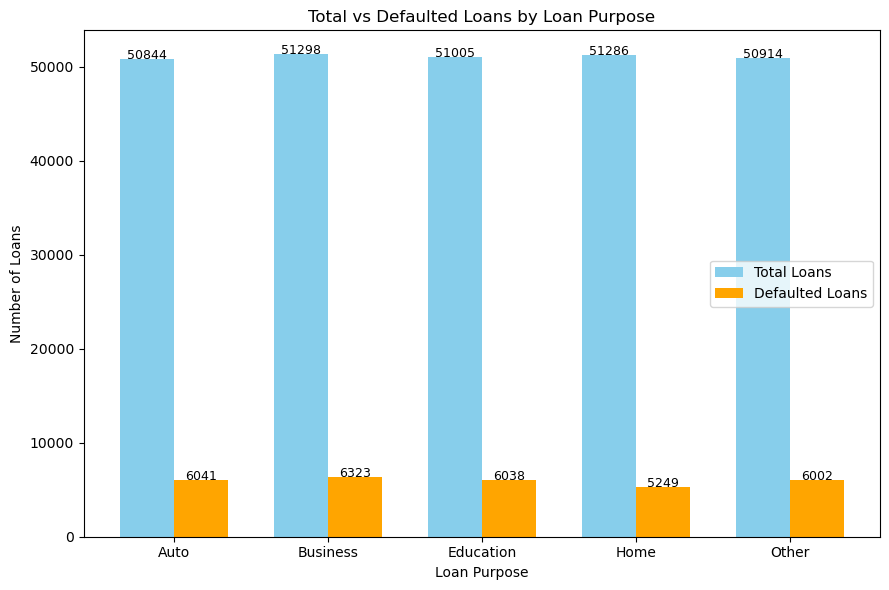

In [18]:
loan_purposes = ["Auto", "Business", "Education", "Home", "Other"]
total_counts = [AutoCount, BusinessCount, EducationCount, HomeCount, OtherCount]
default_counts = [defPurpose1, defPurpose2, defPurpose3, defPurpose4, defPurpose5]

x = range(len(loan_purposes))
width = 0.35  # width of bars

plt.figure(figsize=(9, 6))
plt.bar([i - width/2 for i in x], total_counts, width=width, label='Total Loans', color='skyblue')
plt.bar([i + width/2 for i in x], default_counts, width=width, label='Defaulted Loans', color='orange')

plt.title("Total vs Defaulted Loans by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Number of Loans")
plt.xticks(x, loan_purposes)
plt.legend()

# Add value labels on bars
for i in range(len(loan_purposes)):
    plt.text(i - width/2, total_counts[i] + 0.5, str(total_counts[i]), ha='center', fontsize=9)
    plt.text(i + width/2, default_counts[i] + 0.5, str(default_counts[i]), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Percentage of people that defaulted based on columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_10544\233423374.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_df, x="Category", y="Default %", palette="Blues_d", ax=axes[0, 0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_10544\233423374.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=marital_df, y="Category", x="Default %", palette="Greens_d", ax=axes[0, 1])


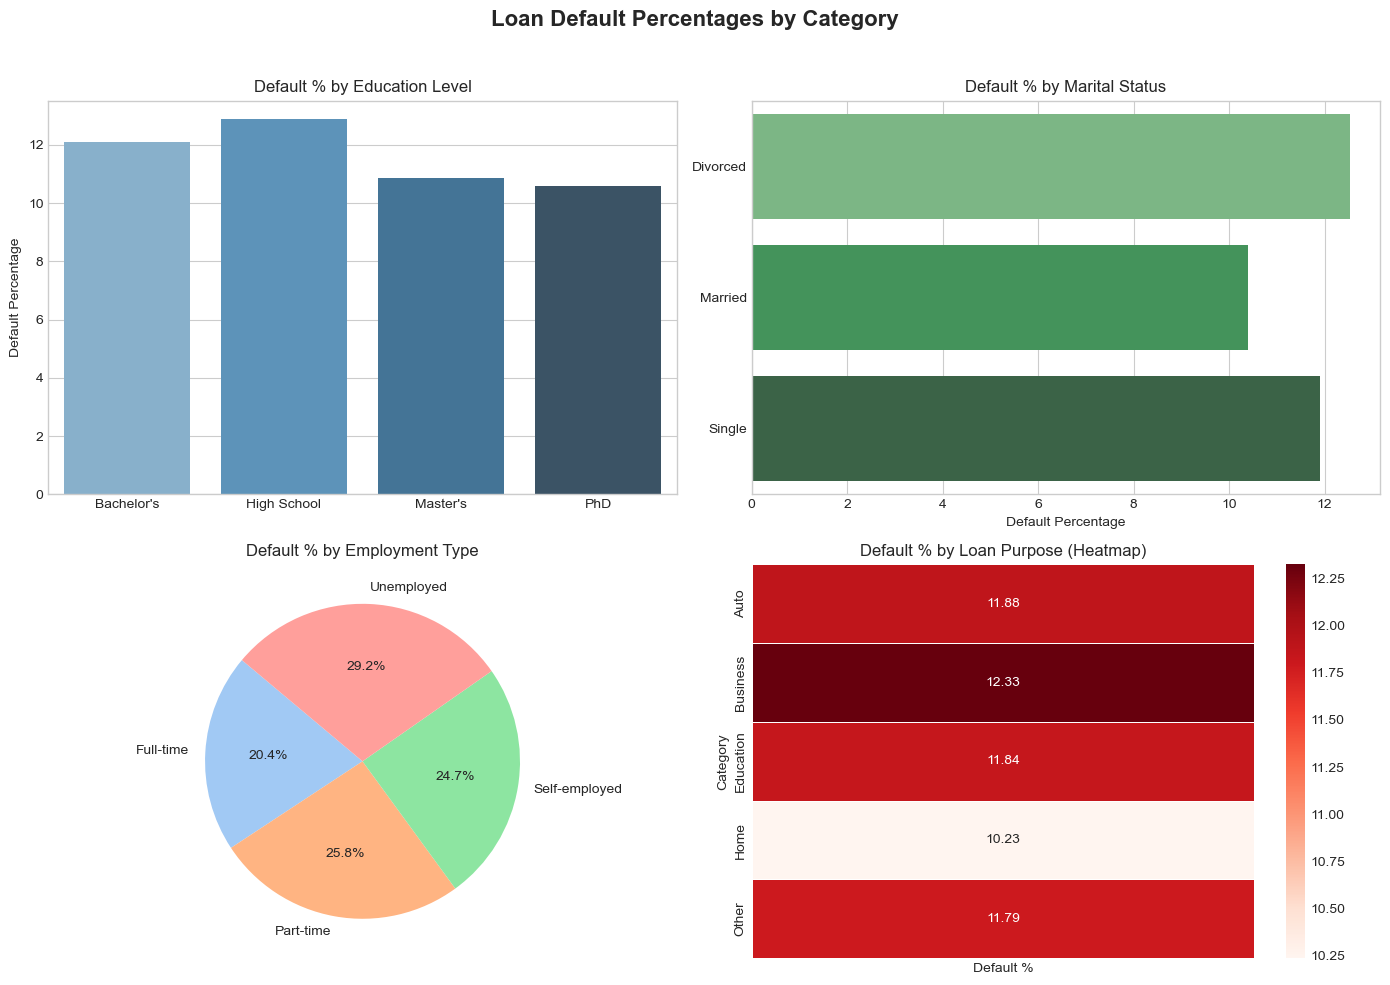

In [19]:
import seaborn as sns

education_cols = ["Education_Bachelor's", "Education_High School", "Education_Master's", "Education_PhD"]
marital_cols = ["MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single"]
employment_cols = ["EmploymentType_Full-time", "EmploymentType_Part-time", "EmploymentType_Self-employed", "EmploymentType_Unemployed"]
purpose_cols = ["LoanPurpose_Auto", "LoanPurpose_Business", "LoanPurpose_Education", "LoanPurpose_Home", "LoanPurpose_Other"]

def calculate_default_percentage(cols):
    results = {}
    for col in cols:
        total = df[col].sum()
        defaulted = len(df[(df[col] == 1) & (df["Default"] == 1)])
        results[col.split("_")[-1]] = (defaulted / total * 100) if total != 0 else 0
    return pd.DataFrame(list(results.items()), columns=["Category", "Default %"])

education_df = calculate_default_percentage(education_cols)
marital_df = calculate_default_percentage(marital_cols)
employment_df = calculate_default_percentage(employment_cols)
purpose_df = calculate_default_percentage(purpose_cols)

plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Loan Default Percentages by Category", fontsize=16, fontweight='bold')

# Education – Vertical Bar Chart
sns.barplot(data=education_df, x="Category", y="Default %", palette="Blues_d", ax=axes[0, 0])
axes[0, 0].set_title("Default % by Education Level")
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Default Percentage")

# Marital Status – Horizontal Bar Chart
sns.barplot(data=marital_df, y="Category", x="Default %", palette="Greens_d", ax=axes[0, 1])
axes[0, 1].set_title("Default % by Marital Status")
axes[0, 1].set_xlabel("Default Percentage")
axes[0, 1].set_ylabel("")

# Employment Type – Pie Chart
axes[1, 0].pie(employment_df["Default %"], labels=employment_df["Category"],
               autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
axes[1, 0].set_title("Default % by Employment Type")

# Loan Purpose – Heatmap
purpose_pivot = purpose_df.set_index("Category")
sns.heatmap(purpose_pivot, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Default % by Loan Purpose (Heatmap)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [21]:
print("Default Percentages by Education Level")
print(education_df.to_string(index=False))
print("\nDefault Percentages by Marital Status")
print(marital_df.to_string(index=False))
print("\nDefault Percentages by Employment Type")
print(employment_df.to_string(index=False))
print("\nDefault Percentages by Loan Purpose")
print(purpose_df.to_string(index=False))


Default Percentages by Education Level
   Category  Default %
 Bachelor's  12.101109
High School  12.878895
   Master's  10.871721
        PhD  10.585958

Default Percentages by Marital Status
Category  Default %
Divorced  12.532781
 Married  10.397177
  Single  11.912436

Default Percentages by Employment Type
     Category  Default %
    Full-time   9.463366
    Part-time  11.965213
Self-employed  11.462029
   Unemployed  13.552895

Default Percentages by Loan Purpose
 Category  Default %
     Auto  11.881441
 Business  12.326017
Education  11.838055
     Home  10.234762
    Other  11.788506


Bivariate Analysis
Relationship between two variables
1. Income vs LoanAmount
2. EmploymentType_Full-time vs Income
3. LoanPurpose_Business vs Default

C:\Users\DELL\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


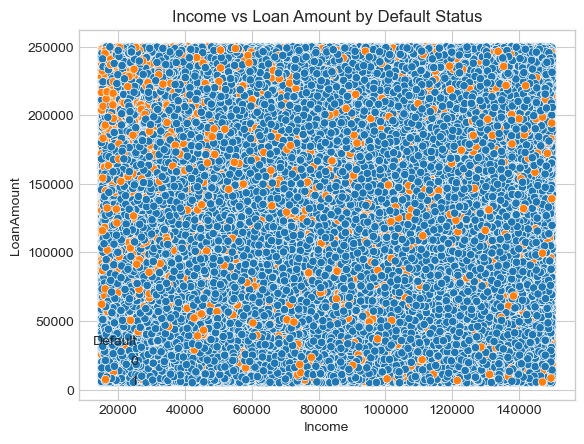

              Income  LoanAmount   Default
Income      1.000000   -0.000865 -0.099119
LoanAmount -0.000865    1.000000  0.086659
Default    -0.099119    0.086659  1.000000


In [22]:
sns.scatterplot(data=df, x="Income", y="LoanAmount", hue="Default")
plt.title("Income vs Loan Amount by Default Status")
plt.show()

# Correlation
print(df[["Income", "LoanAmount", "Default"]].corr())

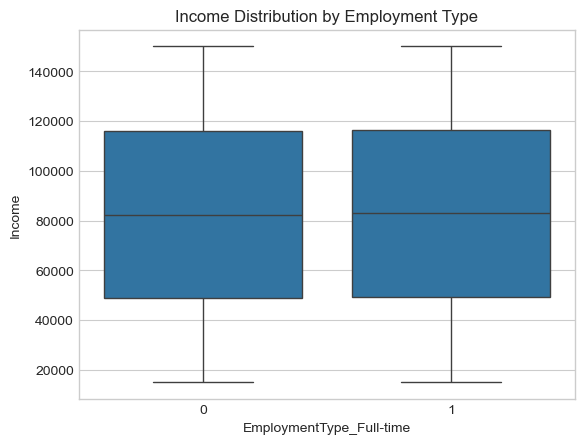

In [23]:
sns.boxplot(data=df, x="EmploymentType_Full-time", y="Income")
plt.title("Income Distribution by Employment Type")
plt.show()

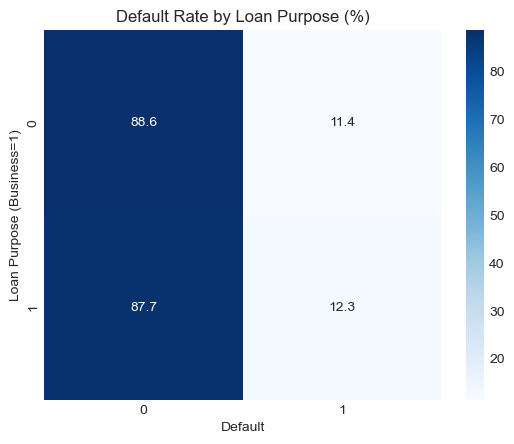

In [32]:
ct = pd.crosstab(df["LoanPurpose_Business"], df["Default"], normalize="index") * 100
sns.heatmap(ct, annot=True, cmap="Blues", fmt=".1f")
plt.title("Default Rate by Loan Purpose (%)")
plt.ylabel("Loan Purpose (Business=1)")
plt.show()


Multivariate Analysis
The relationship between three or more variables
1. Age, Income, LoanAmount, CreditScore, DTIRatio, vs Default

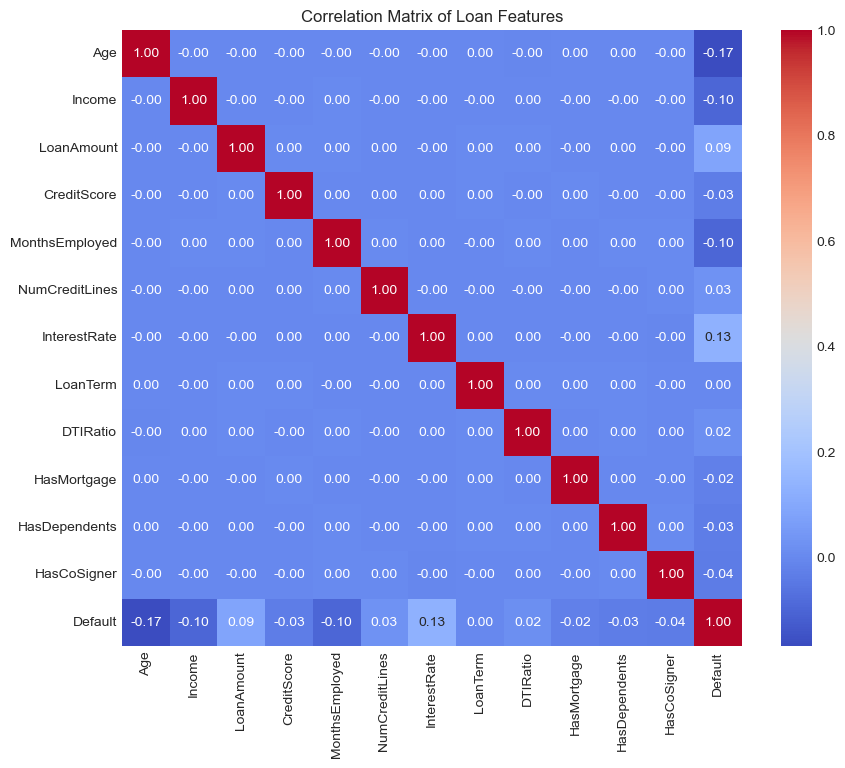

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df[["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines", "InterestRate",
            "LoanTerm", "DTIRatio", "HasMortgage", "HasDependents", "HasCoSigner", "Default"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Loan Features")
plt.show()


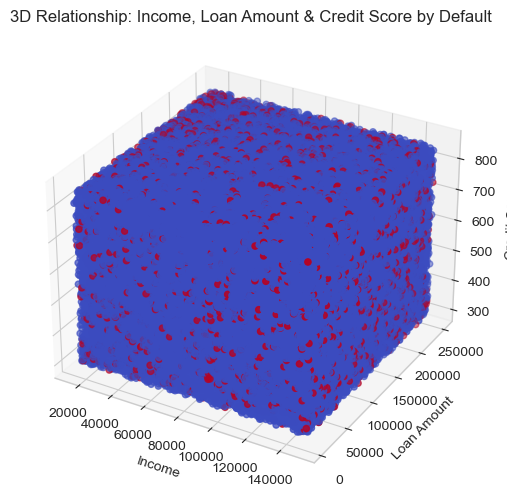

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Income"], df["LoanAmount"], df["CreditScore"], c=df["Default"], cmap="coolwarm")
ax.set_xlabel("Income")
ax.set_ylabel("Loan Amount")
ax.set_zlabel("Credit Score")
plt.title("3D Relationship: Income, Loan Amount & Credit Score by Default")
plt.show()


Correcting class imbalance (Defaults & Non-Defaults)

In [33]:
df["Default"].value_counts(normalize=True) * 100

Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64

Correcting imbalance using SMOTEBoost

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

X = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed",
     "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio", "HasMortgage",
     "HasDependents", "HasCoSigner", "Education_Bachelor's",
     "Education_High School", "Education_Master's", "Education_PhD",
     "EmploymentType_Full-time", "EmploymentType_Part-time",
     "EmploymentType_Self-employed", "EmploymentType_Unemployed",
     "MaritalStatus_Divorced", "MaritalStatus_Married",
     "MaritalStatus_Single", "LoanPurpose_Auto", "LoanPurpose_Business",
     "LoanPurpose_Education", "LoanPurpose_Home", "LoanPurpose_Other",
     "LoanAmount/Income", "LoanAmount/LoanTerm"]
X = df[X]
y = df["Default"]

print("Before SMOTE:", Counter(y))

smote = SMOTE(sampling_strategy = 'auto', random_state = 42, k_neighbors = 5)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 225694, 1: 29653})
After SMOTE: Counter({0: 225694, 1: 225694})


Training...

Decision Tree

In [37]:
df1 = df.copy()

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,   
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(dt, X_train, y_train, cv=cv, scoring="accuracy")
print("\n=== Decision Tree ===")
print(f"Cross-Validation Accuracy: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("\n=== Decision Tree Test Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



=== Decision Tree ===
Cross-Validation Accuracy: [0.86466728 0.8653042  0.86823959 0.86473651 0.86574728]
Mean Accuracy: 0.8657 (+/- 0.0013)

=== Decision Tree Test Results ===
Accuracy: 0.8696360132036598
Confusion Matrix:
 [[38655  6484]
 [ 5285 39854]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     45139
           1       0.86      0.88      0.87     45139

    accuracy                           0.87     90278
   macro avg       0.87      0.87      0.87     90278
weighted avg       0.87      0.87      0.87     90278



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_use = X_resampled  
y_use = y_resampled  

X_train, X_test, y_train, y_test = train_test_split(
    X_use, y_use, test_size=0.2, random_state=42, stratify=y_use
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring="accuracy")
print("\n=== Random Forest ===")
print(f"Cross-Validation Accuracy: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\n=== Random Forest Test Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



=== Random Forest ===
Cross-Validation Accuracy: [0.93335826 0.93317826 0.9342998  0.93254133 0.93363518]
Mean Accuracy: 0.9334 (+/- 0.0006)

=== Random Forest Test Results ===
Accuracy: 0.93381554753096
Confusion Matrix:
 [[44840   299]
 [ 5676 39463]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.99      0.87      0.93     45139

    accuracy                           0.93     90278
   macro avg       0.94      0.93      0.93     90278
weighted avg       0.94      0.93      0.93     90278



Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_use1 = X_resampled  
y_use1 = y_resampled  

X_train, X_test, y_train, y_test = train_test_split(
    X_use1, y_use1, test_size=0.2, random_state=42, stratify=y_use1
)


log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

scores = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring="accuracy")
print("\n=== Logistic Regression ===")
print(f"Cross-Validation Accuracy: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("\n=== Logistic Regression Test Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




=== Logistic Regression ===
Cross-Validation Accuracy: [0.93367672 0.93453518 0.93461826 0.93353826 0.93442441]
Mean Accuracy: 0.9342 (+/- 0.0005)

=== Logistic Regression Test Results ===
Accuracy: 0.9341035468220386
Confusion Matrix:
 [[44850   289]
 [ 5660 39479]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.99      0.87      0.93     45139

    accuracy                           0.93     90278
   macro avg       0.94      0.93      0.93     90278
weighted avg       0.94      0.93      0.93     90278



K Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_use2 = X_resampled  
y_use2 = y_resampled  

X_train, X_test, y_train, y_test = train_test_split(
    X_use2, y_use2, test_size=0.2, random_state=42, stratify=y_use2
)


knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring="accuracy")
print("\n=== K-Nearest Neighbors (KNN) ===")
print(f"Cross-Validation Accuracy: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("\n=== KNN Test Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



=== K-Nearest Neighbors (KNN) ===
Cross-Validation Accuracy: [0.92698901 0.92743208 0.92736285 0.92696131 0.92693362]
Mean Accuracy: 0.9271 (+/- 0.0002)

=== KNN Test Results ===
Accuracy: 0.9280223310219544
Confusion Matrix:
 [[44202   937]
 [ 5561 39578]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     45139
           1       0.98      0.88      0.92     45139

    accuracy                           0.93     90278
   macro avg       0.93      0.93      0.93     90278
weighted avg       0.93      0.93      0.93     90278



Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_use3 = X_resampled  
y_use3 = y_resampled 

X_train, X_test, y_train, y_test = train_test_split(
    X_use3, y_use3, test_size=0.2, random_state=42, stratify=y_use3
)


svm = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel="rbf", probability=True, random_state=42))
])

scores = cross_val_score(svm, X_train, y_train, cv=cv, scoring="accuracy")
print("\n=== Support Vector Machine (SVM) ===")
print(f"Cross-Validation Accuracy: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print("\n=== SVM Test Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
